In [19]:
import pandas as pd
import networkx as nx

In [21]:
df = pd.read_excel("/Users/gleb/Desktop/Master's thesis/digitalGovernance2.0/code/data/main_data.xlsx")

In [4]:
df.head(2)

,Номер_в_издании,Название,Дата,Аннотация,Текст,Источник,"Локация, год",Адресант,Отправитель_и_получатель_unnorm,Отправитель,Получатель,Локация,Год
0,1,Из письма Э. Стайлса Б. Франклину,[9] 20 февраля 1765 г.,Просит содействия в пересылке письма М. В. Лом...,"<<1>>\nСэр.\nЕсли услуга, о которой я прошу ва...","APS, Franklin Papers, vol. 1, folio 124. Подли...","Ньюпорт, [9] 20 февраля 1765 г.",Эзра Стайлс,"['Э. Стайлса', 'Б. Франклину']",Э. Стайлс,Б. Франклин,Ньюпорт,1765
1,2,Письмо Э. Стайлса члену Петербургской Академии...,[9] 20 февраля 1765 г.,"Интересуется русскими научными экспедициями, п...","Эзра Стайлс, американец из Новой Англии, шлет\...","APS, Franklin Papers, vol. 49, folio 19. Подли...","Ньюпорт, [9] 20 февраля 1765 г",Эзра Стайлс,"['Э. Стайлса', 'М. В. Ломоносову']",Э. Стайлс,М. В. Ломоносов,Ньюпорт,1765


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Номер_в_издании                  560 non-null    int64 
 1   Название                         560 non-null    object
 2   Дата                             560 non-null    object
 3   Аннотация                        558 non-null    object
 4   Текст                            560 non-null    object
 5   Источник                         560 non-null    object
 6   Локация, год                     560 non-null    object
 7   Адресант                         157 non-null    object
 8   Отправитель_и_получатель_unnorm  560 non-null    object
 9   Отправитель                      560 non-null    object
 10  Получатель                       521 non-null    object
 11  Локация                          559 non-null    object
 12  Год                              560

In [ ]:
len(df['Локация'].unique())

70

In [37]:
a = df['Отправитель']
b = df['Получатель']

itog['total'] = pd.concat([a,b])

In [38]:
len(itog)

1121

In [41]:
import json

with open('../docs/clean_results/jsons/7merged_json.json', 'r', encoding='utf-8') as f:    
    data = json.load(f)  

In [47]:
names = []

for i in data:
    sender = i.get('Отправитель')
    recipient = i.get('Получатель')
    if sender:
        names.append(sender)

        
    if recipient:
        names.append(recipient)
    


In [51]:
all_names = []
for i in names:
    if isinstance(i, list):
        all_names.extend(i)
    else:
        all_names.append(i)
    

In [54]:
set(all_names)

{'«Балкли, Рассел и К°»',
 '«Блэндоу и К°»',
 '«Братья Крамер»',
 '«Братья Реймберт, племянник и К°»',
 '«Браун и Айвс»',
 '«Браун и Бенсон»',
 '«Браун, Бенсон и Айвс»',
 '«Вернон и К°»',
 '«Готлиб Кюстер и Хюк»',
 '«Дж. Чемплин и Р. Робинсон»',
 '«Иоах. Эбель. Шмидт и К°»',
 '«К. Р. Эрба и К°»',
 '«М. Фишер и К°»',
 '«Мартин Холтерман и сыновья»',
 '«П. Дюборг и К°»',
 '«Сейлем газетт»',
 '«Томсон, Бонар и К°»',
 '«Томсон, Питерс, Бонар и К°»',
 '«У. Джонс и К°»',
 '«У. Ротч и К°»',
 '«Уиллинг и Фрэнсис»',
 '«Эдвард Джеймс Смит и К°»',
 'А. X. Эверетт',
 'А. А. Баранов',
 'А. А. Безбородко',
 'А. А. Нартов',
 'А. А. Чарторыйский',
 'А. Адамс',
 'А. Б. Бентсон',
 'А. Б. Куракин',
 'А. Витфот',
 'А. Г. Евстафьев',
 'А. Галлатин',
 'А. Галлатин, Дж. К. Адамс, Дж. А. Бейард',
 'А. Гамильтон',
 'А. И. Морков',
 'А. Ли',
 'А. Н. Салтыков',
 'А. П. Мельгунов',
 'А. Р. Воронцов',
 'А. С. Мусин-Пушкин',
 'А. Хикс',
 'А. Я. Будберг',
 'А. Я. Дашков',
 'А. Я. Италийский',
 'Адмиралтейств-Коллеги

# metrics

In [5]:
df["Отправитель"] = df["Отправитель"].fillna("Отсутствует")
df["Получатель"] = df["Получатель"].fillna("Отсутствует")

In [6]:

# Функция для преобразования строки в рёбра
def expand_edges(row):
    senders = [row['Отправитель']] if isinstance(row['Отправитель'], str) else row['Отправитель']
    receivers = [row['Получатель']] if isinstance(row['Получатель'], str) else row['Получатель']
    
    edges = []
    for s in senders:
        for r in receivers:
            edges.append((s, r))
    return edges

# Создаём список всех рёбер
all_edges = []
for _, row in df.iterrows():
    all_edges.extend(expand_edges(row))

In [7]:
G = nx.DiGraph()
G.add_edges_from(all_edges)

In [8]:
graph_metrics = {
    "Количество узлов": G.number_of_nodes(),
    "Количество рёбер": G.number_of_edges(),
    "Плотность графа": nx.density(G),
    "Коэффициент кластеризации": nx.average_clustering(G),
    "Связность": nx.is_weakly_connected(G)
}

# 3. Рассчёт графовых метрик
## А. Метрики на уровне всего графа:

In [9]:
graph_metrics

{'Количество узлов': 292,
 'Количество рёбер': 355,
 'Плотность графа': 0.004177846820128984,
 'Коэффициент кластеризации': 0.018130975545265715,
 'Связность': False}

## Б. Метрики на уровне узлов:



In [10]:
# Создаём DataFrame для результатов
node_metrics = pd.DataFrame(index=list(G.nodes()))

# Степени узлов
node_metrics["Входящая степень"] = [d for _, d in G.in_degree()]
node_metrics["Исходящая степень"] = [d for _, d in G.out_degree()]
node_metrics["Общая степень"] = node_metrics["Входящая степень"] + node_metrics["Исходящая степень"]

# Центральности
node_metrics["Посредническая центральность"] = list(nx.betweenness_centrality(G).values())
node_metrics["Близостная центральность"] = list(nx.closeness_centrality(G).values())
node_metrics["Pagerank"] = list(nx.pagerank(G).values())

# Сообщества (используем алгоритм Лувена)
communities = nx.community.louvain_communities(G.to_undirected())
for i, comm in enumerate(communities):
    for node in comm:
        node_metrics.loc[node, "Сообщество"] = i

# 4. Особые метрики для коллективных взаимодействий
## А. Индекс коллективности отправителя:

In [11]:
def sender_collectivity(row):
    if isinstance(row['Отправитель'], list):
        return len(row['Отправитель'])
    return 1

df['Индекс коллективности'] = df.apply(sender_collectivity, axis=1)

## Б. Коэффициент влияния (для узлов):



In [12]:
influence = {}
for node in G.nodes():
    successors = list(G.successors(node))
    influence_score = 0
    for neighbor in successors:
        # Вес связи = количество писем
        weight = G[node][neighbor].get('weight', 1)
        # Учитываем степень важности получателя
        influence_score += weight * (G.in_degree(neighbor) + 1)
    influence[node] = influence_score

node_metrics["Коэффициент влияния"] = node_metrics.index.map(influence)

In [13]:
# Топ-5 узлов по посреднической центральности
print(node_metrics.sort_values("Посредническая центральность", ascending=False).head(5))

# Распределение сообществ
print(node_metrics["Сообщество"].value_counts())

                          Входящая степень  Исходящая степень  Общая степень  \
Н. П. Румянцев                          23                 14             37   
И. А. Остерман                           8                  4             12   
Ф. Дейна                                 4                  6             10   
Екатерина II                            11                  6             17   
Коллегия иностранных дел                 4                  3              7   

                          Посредническая центральность  \
Н. П. Румянцев                                0.050648   
И. А. Остерман                                0.043491   
Ф. Дейна                                      0.041836   
Екатерина II                                  0.040550   
Коллегия иностранных дел                      0.039768   

                          Близостная центральность  Pagerank  Сообщество  \
Н. П. Румянцев                            0.110236  0.043216         9.0   
И. А. Остерман    

In [20]:
names = ['Румянцев', 'Остерман', 'Ф. Дейна', 'Екатерина II', 'Коллегия иностранных дел']

def change_df(row):
    # Проверяем, является ли значение списком или строкой
    senders = row['Отправитель']
    receivers = row['Получатель']
    
    # Приводим к единому формату — списку
    if isinstance(senders, str):
        senders = [senders]
    if isinstance(receivers, str):
        receivers = [receivers]
    
    # Проверяем наличие любого из имен среди отправителей или получателей
    if any(name in senders for name in names) or any(name in receivers for name in names):
        return row
    else:
        return None  # или pd.NA, или просто пропускать

# Применяем функцию по строкам
df_new = df[df.apply(change_df, axis=1).notna()]

In [28]:
df_new = df_new.drop(columns=['Источник', 'Адресант', 'Отправитель_и_получатель_unnorm','Локация','Год'])

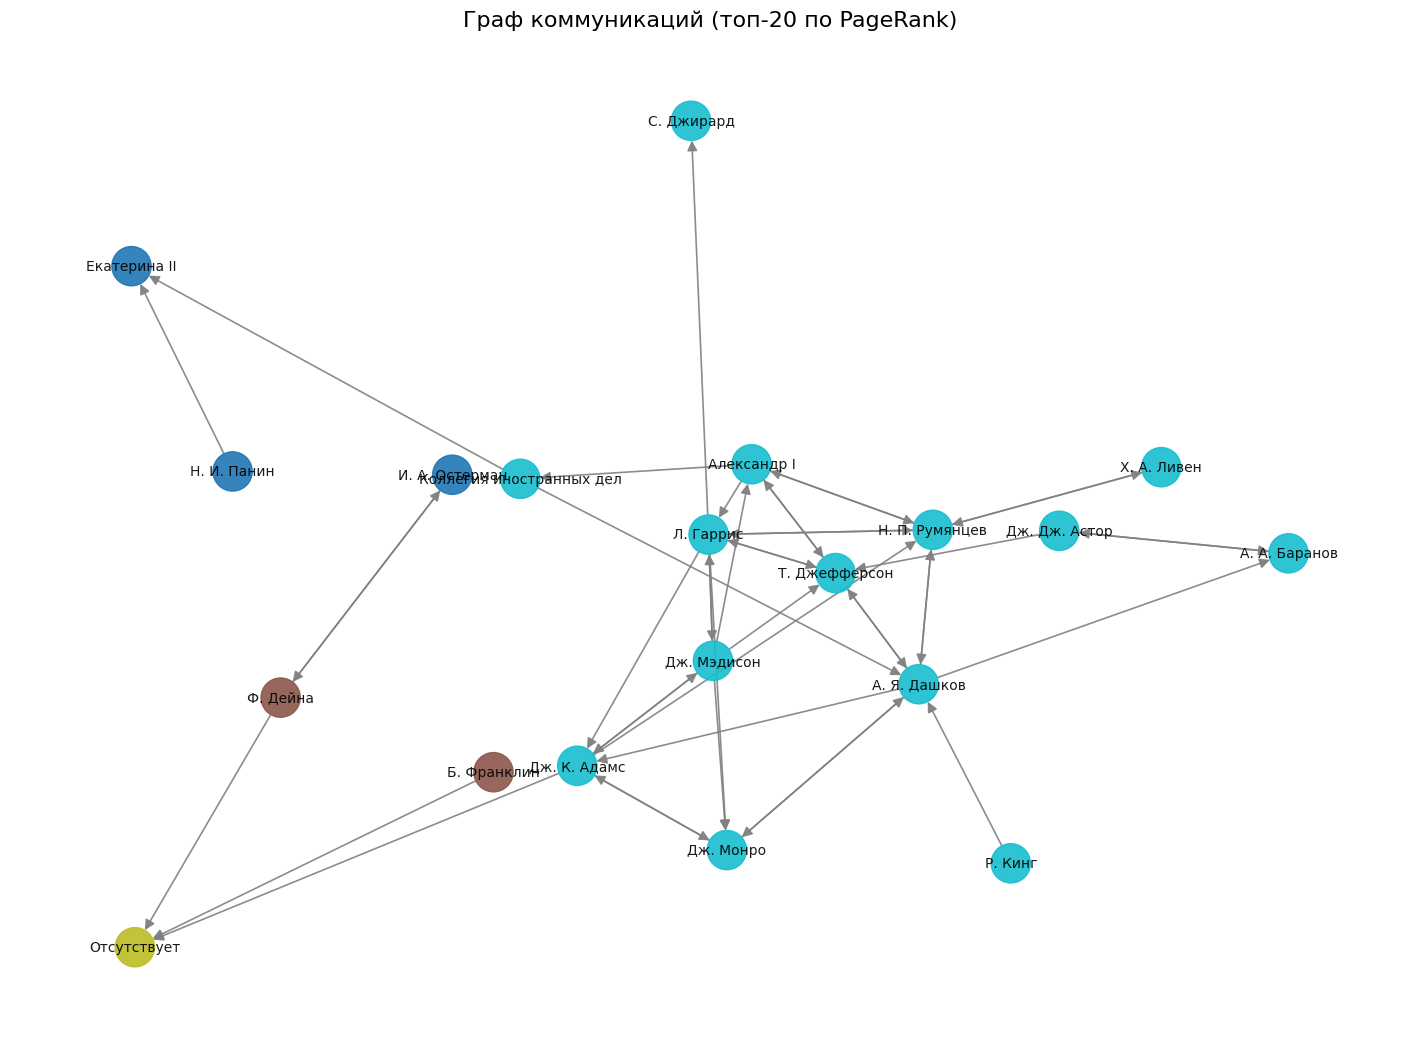

In [14]:
import matplotlib.pyplot as plt

# Уменьшим размер графа для наглядности (например, возьмем подграф из топ-20 узлов по pagerank)
top_nodes = node_metrics.sort_values("Pagerank", ascending=False).head(20).index.tolist()
G_small = G.subgraph(top_nodes)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_small, k=0.5, seed=42)  # Расположение узлов

# Цвета узлов по сообществам
community_to_color = {}
for i, comm in enumerate(communities):
    community_to_color[i] = plt.cm.tab10(i)

node_colors = [community_to_color[node_metrics.loc[node, "Сообщество"]] for node in G_small.nodes()]

# Рисуем граф
nx.draw(G_small, pos,
        with_labels=True,
        node_size=800,
        node_color=node_colors,
        font_size=10,
        edge_color='gray',
        arrows=True,
        alpha=0.9,
        width=1.2,
        arrowstyle='-|>',
        arrowsize=15)

plt.title("Граф коммуникаций (топ-20 по PageRank)", fontsize=16)
plt.show()

In [15]:
print(G.nodes())

['Э. Стайлс', 'Б. Франклин', 'М. В. Ломоносов', 'Г. Гросс', 'Екатерина II', 'Ф. У. Т. Эпинус', 'И. Ф. Сенявин', 'Адмиралтейств-Коллегия', 'А. С. Мусин-Пушкин', 'И. Г. Чернышев', 'Н. И. Панин', 'Г. Ф. Миллер', 'С. М. Козьмин', 'П. Аллэр', 'Отсутствует', 'Георг III', 'В. Г. Лизакевич', 'Дж. Роуз', 'Дж. Потс', 'И. С. Барятинский', 'И. А. Остерман', 'Д. А. Голицын', 'С. Дин', 'Ш. Дюма', 'Ф. В. Каржавин', 'Дж. Хэнкок', 'А. Ли', 'Председатель комиссии по иностранным делам США', 'Коммерц-Коллегия', 'Дж. Ледиард', 'Дж. Адамс', 'Дж. Джей', 'Коллегия иностранных дел', 'Правительства Англии; Франции; Испании', 'Бар', 'У. Ирвин', 'Ж. Лузак', 'Континентальный конгресс', 'С. Сейр', 'И. М. Симолин', 'Н. К. Хотинский', 'С. Хантингтон', 'Ф. Дейна', 'А. П. Мельгунов', 'Дж. Рут', "['Дж. Адамс', 'Б. Франклин', 'Дж. Джей', 'Г. Лоренс', 'Т. Джефферсон']", 'Т. Маккин', 'Дж. К. Адамс', 'Дж. Тэкстер', 'Р. Ливингстон', 'А. Витфот', 'А. И. Морков', 'Петербургская Академия наук', "['Д. А. Голицын', 'А. И. Морков'

In [16]:
print(G.edges())

[('Э. Стайлс', 'Б. Франклин'), ('Э. Стайлс', 'М. В. Ломоносов'), ('Б. Франклин', 'Э. Стайлс'), ('Б. Франклин', 'Ф. У. Т. Эпинус'), ('Б. Франклин', 'Отсутствует'), ('Г. Гросс', 'Екатерина II'), ('Екатерина II', 'Георг III'), ('Екатерина II', 'Адмиралтейств-Коллегия'), ('Екатерина II', 'Правительства Англии; Франции; Испании'), ('Екатерина II', 'И. М. Симолин'), ('Екатерина II', 'А. П. Мельгунов'), ('Екатерина II', 'П. Б. Пассек'), ('Ф. У. Т. Эпинус', 'Б. Франклин'), ('И. Ф. Сенявин', 'Адмиралтейств-Коллегия'), ('А. С. Мусин-Пушкин', 'Екатерина II'), ('А. С. Мусин-Пушкин', 'Н. И. Панин'), ('И. Г. Чернышев', 'Екатерина II'), ('Н. И. Панин', 'Екатерина II'), ('Н. И. Панин', 'И. С. Барятинский'), ('Г. Ф. Миллер', 'С. М. Козьмин'), ('П. Аллэр', 'Отсутствует'), ('В. Г. Лизакевич', 'Н. И. Панин'), ('Дж. Роуз', 'Дж. Потс'), ('И. С. Барятинский', 'И. А. Остерман'), ('И. С. Барятинский', 'Н. И. Панин'), ('И. С. Барятинский', 'Екатерина II'), ('И. А. Остерман', 'А. И. Морков'), ('И. А. Остерман', 

3. Базовые свойства графа

Graph with 292 nodes and 349 edges

Order of the graph: 292
Size of the graph: 349


nx.density(G)
0.008214470649155016
